In [169]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [171]:
dataset = pd.read_csv('/content/drive/MyDrive/project/preprocessing.csv')
dataset=dataset.drop("id",axis=1)
dataset=dataset.drop("sl",axis=1)

In [172]:
dataset

age  bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...  pcv  wc  rc  htn  dm  \
0     48  80  1.020   1   0    1   1    0   0  121  ...   32  72  31    1   1   
1      7  50  1.020   4   0    1   1    0   0  121  ...   26  56  18    0   0   
2     62  80  1.010   2   3    1   1    0   0  423  ...   19  70  18    0   1   
3     48  70  1.005   4   0    1   0    1   0  117  ...   20  62  18    1   0   
4     51  80  1.010   2   0    1   1    0   0  106  ...   23  68  25    0   0   
..   ...  ..    ...  ..  ..  ...  ..  ...  ..  ...  ...  ...  ..  ..  ...  ..   
395   55  80  1.020   0   0    1   1    0   0  140  ...   35  62  28    0   0   
396   42  70  1.025   0   0    1   1    0   0   75  ...   42  72  41    0   0   
397   12  80  1.020   0   0    1   1    0   0  100  ...   37  61  33    0   0   
398   17  60  1.025   0   0    1   1    0   0  114  ...   39  67  38    0   0   
399   58  80  1.025   0   0    1   1    0   0  131  ...   41  63  40    0   0   

     cad  appet  pe  ane  classification  
0      1      0   0    0               0  
1      1      0   0    0               0  
2      1      1   0    1               0  
3      1      1   1    1               0  
4      1      0   0    0               0  
..   ...    ...  ..  ...             ...  
395    1      0   0    0               1  
396    1      0   0    0               1  
397    1      0   0    0               1  
398    1      0   0    0               1  
399    1      0   0    0               1  

[400 rows x 25 columns]

In [173]:
x =dataset.drop('classification',axis=1)
y=dataset['classification']


In [174]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [175]:
# sc = StandardScaler()
# x = sc.fit_transform(x)

In [176]:
x_train , x_test , y_train , y_test   = train_test_split(x,y,test_size = 0.2 , random_state=123)

In [177]:
x_test

age   bp     sg  al  su  rbc  pc  pcc  ba  bgr  ...   hemo  pcv  wc  rc  \
234   37  100  1.010   0   0    0   1    0   0  121  ...  15.00   32  40  31   
42    47  100  1.010   0   0    0   1    0   0  204  ...   9.70   21  84  24   
303   55   70  1.020   0   0    1   1    0   0  107  ...  17.00   38  62  40   
155   50   70  1.020   3   0    0   1    1   1  123  ...  11.10   24  44  18   
342   44   60  1.020   0   0    1   1    0   0   95  ...  15.00   38  71  42   
..   ...  ...    ...  ..  ..  ...  ..  ...  ..  ...  ...    ...  ...  ..  ..   
179   72   90  1.010   2   0    0   0    1   0  124  ...  11.90   27  34  16   
202   78   60  1.020   0   0    1   1    0   0  114  ...   8.00   12   5  25   
323   43   80  1.025   0   0    1   1    0   0  130  ...  15.90   33  72  24   
114   12   60  1.015   3   0    0   0    1   0  121  ...  12.10   32   4  22   
328   28   70  1.020   0   0    1   1    0   0  131  ...  12.65   33  80  44   

     htn  dm  cad  appet  pe  ane  
234    1   0    1      0   0    0  
42     1   0    1      0   0    1  
303    0   0    1      0   0    0  
155    0   0    1      0   0    0  
342    0   0    1      0   0    0  
..   ...  ..  ...    ...  ..  ...  
179    0   0    1      0   0    0  
202    0   1    1      0   0    1  
323    0   0    1      0   0    0  
114    0   0    1      0   0    0  
328    0   0    1      0   0    0  

[80 rows x 24 columns]

In [178]:
#ann
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping #we are not going to use it
from keras.models import Sequential, Model

from keras.optimizers import Adam
from sklearn.model_selection import KFold #Will not be used

In [179]:
def model():
  classifier = Sequential()
  classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation='relu'))
  classifier.add(Dropout(0.2))
  classifier.add(Dense(15, activation='relu'))
  classifier.add(Dropout(0.4))
  classifier.add(Dense(1, activation='sigmoid'))
  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return classifier

In [180]:
model = model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                375       
                                                                 
 dropout_6 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 15)                240       
                                                                 
 dropout_7 (Dropout)         (None, 15)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 631 (2.46 KB)
Trainable params: 631 (2.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
#ANN
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, verbose=1)

Epoch 1/5
10/10 [==============================] - 1s 18ms/step - loss: 51.2695 - accuracy: 0.3750 - val_loss: 27.3529 - val_accuracy: 0.3375
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 39.3382 - accuracy: 0.3938 - val_loss: 11.3504 - val_accuracy: 0.3875
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 24.2417 - accuracy: 0.5094 - val_loss: 6.7204 - val_accuracy: 0.5000
Epoch 4/5
10/10 [==============================] - 0s 6ms/step - loss: 19.7680 - accuracy: 0.4969 - val_loss: 8.7267 - val_accuracy: 0.5750
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 20.2941 - accuracy: 0.4531 - val_loss: 9.5682 - val_accuracy: 0.6125


In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(x_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(x_test))}")

Training Accuracy of KNN is 0.915625
Test Accuracy of KNN is 0.8375 

Confusion Matrix :- 
[[43 10]
 [ 3 24]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        53
           1       0.71      0.89      0.79        27

    accuracy                           0.84        80
   macro avg       0.82      0.85      0.83        80
weighted avg       0.86      0.84      0.84        80



In [183]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
# If not, you can use make_classification to create a sample dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear SVM with L1 penalty
svm_l1 = LinearSVC(penalty='l1', dual=False, random_state=42)
svm_l1.fit(x_train, y_train)
y_pred_l1 = svm_l1.predict(x_test)

# Linear SVM with L2 penalty
svm_l2 = LinearSVC(penalty='l2', dual=True, random_state=42)
svm_l2.fit(x_train, y_train)
y_pred_l2 = svm_l2.predict(x_test)

# Evaluate accuracy for L1 penalty
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Accuracy with L1 penalty: {accuracy_l1}')

# Evaluate accuracy for L2 penalty
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy with L2 penalty: {accuracy_l2}')

Accuracy with L1 penalty: 0.9875
Accuracy with L2 penalty: 0.9875


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [184]:
#naiv
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model
nvmodel=nb.fit(x_train,y_train)
nb.score(x_test,y_test)


0.9875

In [185]:
import pickle
pickle.dump(nb, open('naiveclass.pkl', 'wb'))

In [186]:
with open('naiveclass.pkl', 'rb') as file:
    navpickle = pickle.load(file)

In [187]:
print("train score - " + str(nb.score(x_train, y_train)))
print("test score - " + str(nb.score(x_test, y_test)))

train score - 0.971875
test score - 0.9875


In [188]:
y_train_nb = nb.predict(x_train)
y_test_nb = nb.predict(x_test)

In [189]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [190]:
#naiv
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [191]:
navpickle.predict([[30,80,1.02	,0,	0	,1,	1	,0,	0	,89,	42	,0.5,	139,	5,	16.7,	40	,3	,29	,0	,0	,1	,0	,0	,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [192]:
nb.predict([[58,80,1.025,0	,0,	1	,1,	0	,0	,131,	18,	1.1,	141	,3.5,	15.8,	41	,63	,40	,0	,0	,1	,0	,0	,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [193]:
d=[[34,80,1.025,0,0,1,1,0,0,121,27,1.2,144,3.9,13.6,40,84,42,0,0,1,0,0,0]]
sc = StandardScaler()
# d=np.array([d])
xs= sc.fit_transform(d)
nb.predict(xs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [194]:
xs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [195]:
nb.predict([[58,80,1.025,0,0,1,1,0,0	,131,18,1.1	,141,3.5,15.8,41,63,40,0,0,1,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [196]:
nb.predict([[57	,80	,1.02,	0	,0	,1	,1	,0	,0	,133,48	,1.2,	147,	4.3	,14.8,	34,	61,	34,	0	,0,	1	,0	,0	,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [197]:
nb.predict([[34	,80,	1.025	,0	,0	,1	,1	,0	,0	,121	,27	,1.2,	144	,3.9,	13.6,	40,	84	,42	,0	,0	,1	,0	,0,	0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

3/3 [==============================] - 0s 2ms/step


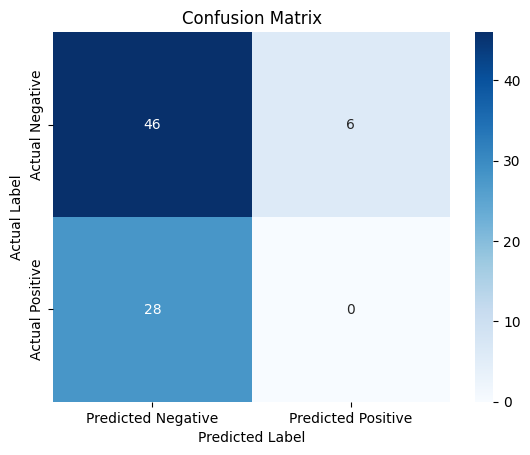

Accuracy: 0.575


In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predictions (y_pred) and actual labels (y_test)
y_pred = model.predict(x_test)  # Replace 'model' with your actual model
y_pred_binary = (y_pred > 0.5).astype(int)  # Example threshold for binary classification

conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Example: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")
